In [1]:
from __future__ import annotations
import fnmatch
import sys
from cv2 import equalizeHist
import pandas as pd
import os
import pydicom
import json
import cv2 
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
from PIL import Image
import fnmatch
import glob
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import numpy as np

def plot_image(image, anns,class_labels):
    """Plots predicted bounding boxes on the image"""
    # Create a Rectangle patch
    df = pd.DataFrame(columns=["x", "y", "text"])
    colors = [(235, 47, 26), (235, 158, 26), (207, 235, 26), (26, 235, 64),  (26, 221, 235), (71, 26, 235), (158, 26, 235), (235, 26, 151)]
    for ann in anns:
        #print("inside fun",len(ann),ann)
        assert len(ann) == 4, "box should contain  class_indx,score,poly,indx"
        class_pred = ann[0]
        if(class_pred<8):
        #box = box[2:]
            poly_coords=[ann[2]]
            #print(len(poly_coords))
            cv2.drawContours(image,poly_coords, 0,colors[int(class_pred)],3)
            #print(name, "anns",class_labels[int(class_pred)], poly_coords[0])
            bbox = cv2.boundingRect(poly_coords[0])
            #print(x_c,y_c,x_min,y_min,w,h)
        
            # Add the patch to the Axes
            #image.add_patch(poly)
            for pt in poly_coords[0]:
                print(pt)
                df=df.append([{"x":pt[0],"y":pt[1], "text": class_labels[int(class_pred)]+"-BI-"+str(ann[1])+"{"+str(ann[3])+"}" }])
            
            #cv2.putText(img=image, text=class_labels[int(class_pred)]+"-BI-"+str(ann[1])+"{"+str(ann[3])+"}", org=(max(bbox[0]-5,0),max(bbox[1]-5,0)), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=colors[int(class_pred)],thickness=2)

            
       
    return image, df

    ###
    #plt.savefig('pltsave.png')
def extract_annotation(json_path):
    anns=[] 
    
    try:
        f1 = open(json_path) 
        #f2 = open(json_path_2)
        annotations=json.load(f1)
        indx_counter=-1
        for annotation in annotations:
            #print(annotation)
            indx_counter+=1
            if(annotation["label"]!=8 and annotation["label_name"]!="Normal"):
                try:
                    polys = np.asarray(annotation['poly'])
                    anns.append([int(annotation["label"]),annotation["BIRADS_level"],polys, indx_counter])
                    print(indx_counter,"label:",annotation["label"],"Level:",annotation["BIRADS_level"],"contour",*polys)
                except Exception as e:
                    print("error occured processing",json_path_1)
                #print(df_loc["label"][0])
            if(annotation["label"]==8):
                anns.append([8,annotation["Density_level"],[], indx_counter])
            if (annotation["label_name"]=="Normal"):
                anns.append([9,0,[], indx_counter])

        f1.close()
        
        if len(anns)==0:  
            print(f"No annotation by {first_doctor}")
            
        return anns
        
        
    except BaseException as err:
            print(f"Unexpected {err=}, {type(err)=}",json_path)
            return anns
##declare annotation files
def write_json(new_data, filename='data.json'):
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 6)


  

annotation by  Wube
1 label: 1 Level: 2 contour [ 163 1206] [ 172 1233] [ 162 1240] [ 133 1221]
2 label: 1 Level: 2 contour [  77 1132] [  82 1142] [  84 1164] [  60 1162]
3 label: 1 Level: 2 contour [ 157 1526] [ 169 1531] [ 157 1554] [ 130 1549]
4 label: 1 Level: 2 contour [ 332 1666] [ 332 1684] [ 316 1698] [ 304 1673]
5 label: 1 Level: 2 contour [ 309 1913] [ 316 1926] [ 302 1929] [ 290 1924] [ 290 1916]
6 label: 1 Level: 2 contour [  49 1613] [  59 1613] [  59 1642] [  47 1622]
7 label: 1 Level: 2 contour [  49 1786] [  62 1789] [  59 1804] [  42 1803]
8 label: 1 Level: 2 contour [ 297 2022] [ 307 2021] [ 307 2034] [ 299 2038]
annotation by  Betty
Unexpected err=FileNotFoundError(2, 'No such file or directory'), type(err)=<class 'FileNotFoundError'> /Volumes/0973111473/Paulis_annotation2/Mammo__1Betty/PAT_Pl_003586/00-UN-UN.dcm.json
[ 163 1206]
[ 172 1233]
[ 162 1240]
[ 133 1221]
[  77 1132]
[  82 1142]
[  84 1164]
[  60 1162]
[ 157 1526]
[ 169 1531]
[ 157 1554]
[ 130 1549]
[ 332 

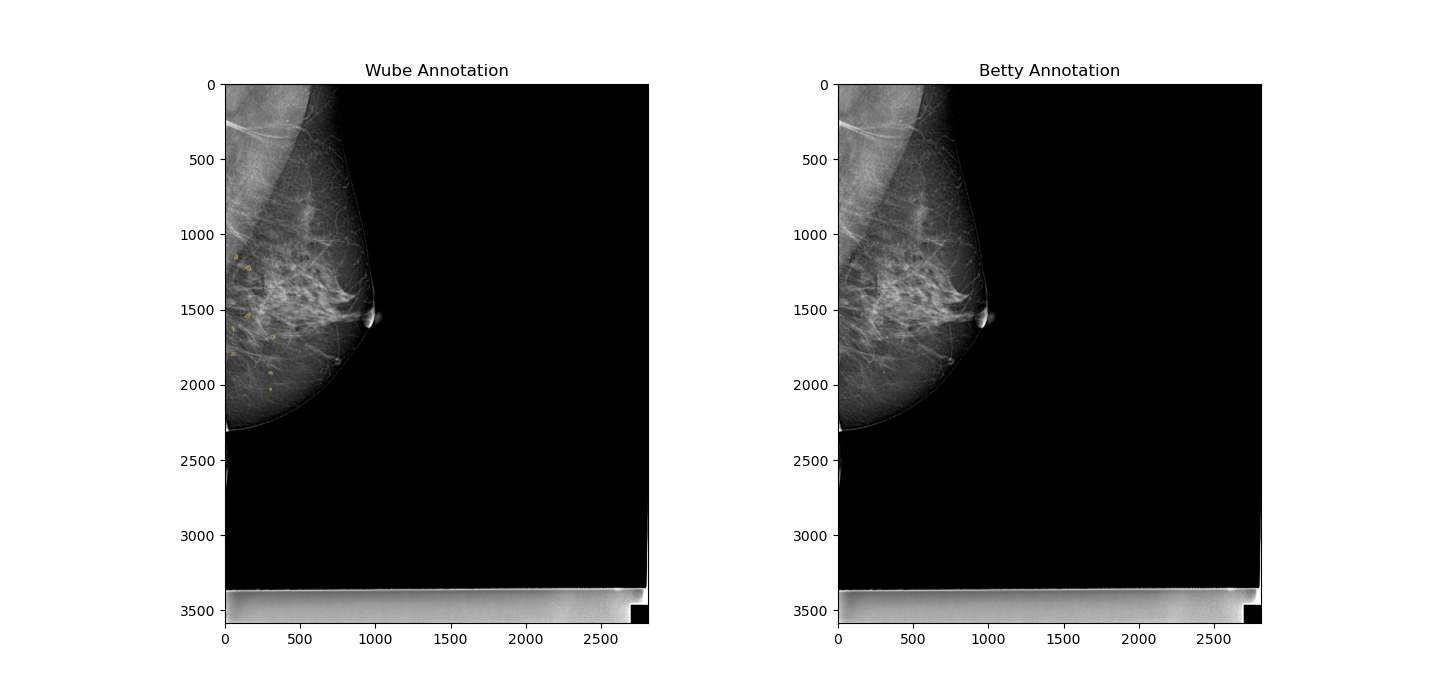

KeyboardInterrupt: Interrupted by user

In [2]:
class_names=["Mass","Calcification", "Architectureal Distortion", "Asymmetry", "Ductal Dialtion", "Skin Tichening", "Nipple Retraction", "Lymphnode"]
birads_level_names=["BI-RADS 2", "BI-RADS 3","BI-RADS 4", "BI-RADS 5"]
data_directory_1 = "/Volumes/MLData/Paulis_Annotation/mammo__1W"
data_directory_2 = "/Volumes/0973111473/Paulis_annotation2/Mammo__1Betty"
joined_data="/Users/sam/Desktop/new extraction/mammo1.csv"
imsave_directory="/Users/sam/Desktop/new extraction/saved_fig"
ann2 = pd.read_csv(joined_data)
first_doctor="Wube"
second_doctor="Betty"


df_csv = pd.DataFrame(columns=["indx", "id", "patient_id","file_name","annotations", "needs_recheck"])
df_csv_ann = pd.DataFrame(columns=["indx", "id", "patient_id","file_name","class","BIRADS", "poly", "ann_by"])

start_index=int(input("please Enter first index"))
if(start_index==0):
    resp=input("Are you sure to delete existing data? Y|N")
    if resp.upper()!="Y":
        sys.exit()
final_annotations=[]
%matplotlib widget
for index, row in ann2.iterrows():
    if(index>=start_index):    
        indx=row['indx']
        folder_name=indx.split("-")[0]
        file_name=indx.split("-")[1]+"-"+indx.split("-")[2]+"-"+indx.split("-")[3][:-5]
        #print(folder_name,file_name)
        is_normal_1=is_normal_2=False
        density_level_1=density_level_2=-1
        #print("Got Here:!")
        try: 
            impath= os.path.join(data_directory_1, folder_name,file_name)
            #im_save_path=os.path.join(destination_directory,str(im_counter)+"_"+filename[:-4]+".png")
            #print(impath)
            
            json_path_1=os.path.join(data_directory_1,folder_name,file_name+".json")
            json_path_2=os.path.join(data_directory_2,folder_name,file_name+".json")
            
            
        
            ds = pydicom.dcmread(impath, force=True)
            img= ds.pixel_array.astype(float)
            
            if 'WindowWidth' in ds:
                #print('Dataset has windowing')
                windowed  = apply_voi_lut(ds.pixel_array, ds)
                #plt.imshow(windowed, cmap="gray", vmax=windowed.max(), vmin=windowed.min)
                #plt.show()
                img=windowed.astype(float)
                #return "windowed"
            # Convert to uint
            img = (np.maximum(img,0) / img.max()) * 255.0
            img= np.uint8(img)
            img = cv2.merge([img,img,img])
            #img = cv2.COLOR_GRAY2RGB()
            #(ori_h,ori_w)=img.shape
            print("annotation by ",first_doctor)
            anns_1=extract_annotation(json_path_1)
            print("annotation by ",second_doctor)
            anns_2=extract_annotation(json_path_2)
            
            im_1=img.copy()
            im_2=img.copy()
            
            #print("processing file", index, "of ", len(ann2.index))
            if len(anns_1)>0:          
                im_1,df1=plot_image(im_1, anns_1,class_names)
            if len(anns_2)>0:
                im_2,df2=plot_image(im_2, anns_2,class_names)
            # Create figure and axes
            print(df1)
            fig, ax = plt.subplots(1,2)
            fig.set_size_inches(14.5, 7, forward=True)
            

            # Display the image
            ax[0].imshow(im_1)
            sc1=ax[0].scatter(df1["x"],df1["y"],s=0.01)
            tt = df1["text"].values
            # annotation
            annot1 = ax[0].annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points")
            annot1.set_visible(False)

            ax[1].imshow(im_2)
            
            ax[0].set_title(first_doctor+" Annotation")
            ax[1].set_title(second_doctor+" Annotation")
            def hover(event):
                # check if event was in the axis
                if event.inaxes == ax[0]:
                    
                    
                    # get the points contained in the event
                    cont, ind = sc1.contains(event)
                    print(cont,ind)
                    
                    annot1.xy = (event.xdata, event.ydata)
                    annot1.set_text("annotated")
                    annot1.set_visible(True) 
                    if cont:
                        
                        # change annotation position
                        annot1.xy = (event.xdata, event.ydata)
                        # write the name of every point contained in the event
                        annot1.set_text("{}".format(', '.join([tt[n] for n in ind["ind"]])))
                        annot1.set_visible(True)    
                    else:
                        annot1.set_visible(False)
                
                    
            fig.canvas.mpl_connect("motion_notify_event", hover)

            plt.show()
            #print(anns_1,anns_2)
            selected_ann_from_1 = [int(item) for item in input("Anntoations to keep from "+first_doctor+": ").split(",")]
            
            selected_ann_from_2=[int(item) for item in input("Anntoations to keep from "+second_doctor+": ").split(",")]
            #print(selected_ann_from_1,selected_ann_from_2)
            needs_recheck=input("does these annotation need a checkup")
            curr_ann=[]
            if len(anns_1)>0:   
                for i in selected_ann_from_1:
                    if(i>-1):
                        curr_ann.append({"class":anns_1[i][0],"BIRADS":anns_1[i][1], "poly":anns_1[i][2].tolist(),"ann_by":first_doctor})
                        df_csv_ann=df_csv_ann.append([{"indx":indx,"id":index,"patient_id":folder_name,"file_name":file_name,"class":anns_1[i][0],"BIRADS":anns_1[i][1], "poly":anns_1[i][2].tolist(),"ann_by":first_doctor}], ignore_index=True)
            if len(anns_2)>0:   
                for i in selected_ann_from_2:
                    if(i>-1):
                        curr_ann.append({"class":anns_2[i][0],"BIRADS":anns_2[i][1], "poly":anns_2[i][2].tolist(), "ann_by":second_doctor})
                        df_csv_ann=df_csv_ann.append([{"indx":indx,"id":index,"patient_id":folder_name,"file_name":file_name,"class":anns_2[i][0],"BIRADS":anns_2[i][1], "poly":anns_2[i][2].tolist(), "ann_by":second_doctor}],ignore_index=True)
            final_annotation={indx:{"id": index,"patient_id":folder_name,"file_name":file_name,"annotations":curr_ann, "needs_recheck":needs_recheck}}
            df_csv=df_csv.append([{"indx":indx,"id":index,"patient_id":folder_name,"file_name":file_name,"annotations":curr_ann, "needs_recheck":needs_recheck}], ignore_index=True)
            print(final_annotation)
            final_annotations.append(final_annotation)
            #print(final_annotations)
            print(df_csv)
            print(df_csv_ann)
            c=input("Press Enter to continue...")
            if c=="q":
                break;
            plt.savefig(os.path.join(imsave_directory,indx[:-5]+".png"))
            plt.close('all')
        except Exception as e:
            print("General error Occured at the end",e)
            break;     

if(start_index==0):
    df_csv.to_csv("checked_data.csv", mode="w", index=False, header=True)
    df_csv_ann.to_csv("checked_data_each_ann.csv", mode="w", index=False, header=True)
    out_file = open("checked_data.json", "w")
    json.dump(final_annotations, out_file, indent = 6)
    
    out_file.close()

else:
    df_csv.to_csv("checked_data.csv", mode="a", index=False, header=False)
    df_csv_ann.to_csv("checked_data_each_ann.csv", mode="a", index=False, header=False)
    write_json(final_annotations, filename="checked_data.json")


